<a href="https://colab.research.google.com/github/wjbgis/wjbgis.github.io/blob/master/DeepSegmentor_deepcrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Clone the repository with Colab support

In [ ]:
import os
if os.path.isdir('/content/DeepSegmentor'):
  !git pull;
else:
  !git clone https://github.com/DZDL/DeepSegmentor

Already up to date.


In [ ]:
%cd DeepSegmentor

/content/DeepSegmentor


# 2. Install requirements

# DeepSegmentator Colab version

Please check original authors in https://github.com/yhlleo/DeepSegmentor

And adapted in https://github.com/DZDL/DeepSegmentor

In [ ]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 686kB 13.5MB/s 
     |████████████████████████████████| 204kB 17.9MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655252 sha256=9111c2a5efa4f316955b3bd179264c523b9c4ec914b906e70b36b2c5ff1ebb3d
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5713 sha256=cb611103972063d502087e7b0b84be82422409682fd7227b61300e1f19fd87d7
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# 3. Downloand the weights.

Check more in https://github.com/DZDL/DeepSegmentor

In [ ]:
# RoadNet Pretrained weights 
!gdown --id 12-iXK656aGUIWCtN9gb0Ko7qotyn9ZcI -O ./checkpoints/deepcrack/latest_net_G.pth;

Downloading...
From: https://drive.google.com/uc?id=12-iXK656aGUIWCtN9gb0Ko7qotyn9ZcI
To: /content/DeepSegmentor/checkpoints/deepcrack/latest_net_G.pth
58.9MB [00:00, 82.1MB/s]


# 4. Upload your images automatically or manually

This step depends on what you want to do.
If manually, upload files to 

- /content/DeepSegmentor/datasets/DeepCrack/test_img/


In [ ]:
# AUTOMATICALLY

# !gdown --id "ID_HERE_OF_ZIP_FILE" -O "/content/DeepSegmentor/datasets/DeepCrack/test_img/"
# !unzip /content/DeepSegmentor/datasets/DeepCrack/test_img/NAMEZIP.zip /content/DeepSegmentor/datasets/DeepCrack/test_img/
# !rm /content/DeepSegmentor/datasets/DeepCrack/test_img/

# MANUAL
# 
#
#

# 5. Run the inference script


This script will get all the images from 

- /content/DeepSegmentor/datasets/DeepCrack/test_img/


and being process with results in 

- /content/DeepSegmentor/results/deepcrack/test_latest/images/

In [ ]:
# 0 is de ID of GPU_DEVICE recognized by PyTorch. There are more features
# Please !cat scripts/test_deepcrack.sh to see more parameters

# If error "CUDA OUT OF MEMORY" APPEARS, try to downscale your image. works with (1000x1000)
# perfectly or even with non-squared images.

!sudo sh scripts/test_deepcrack.sh 0

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/DeepCrack          	[default: None]
             dataset_mode: deepcrack                     
                direction: AtoB                          
            display_sides: 1                             
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None

# 6. Show results

With the code below you're going to display on Colab the images fused.

Search in path

- /content/DeepSegmentor/results/deepcrack/test_latest/images/

the images that ends with `..._fused.png`

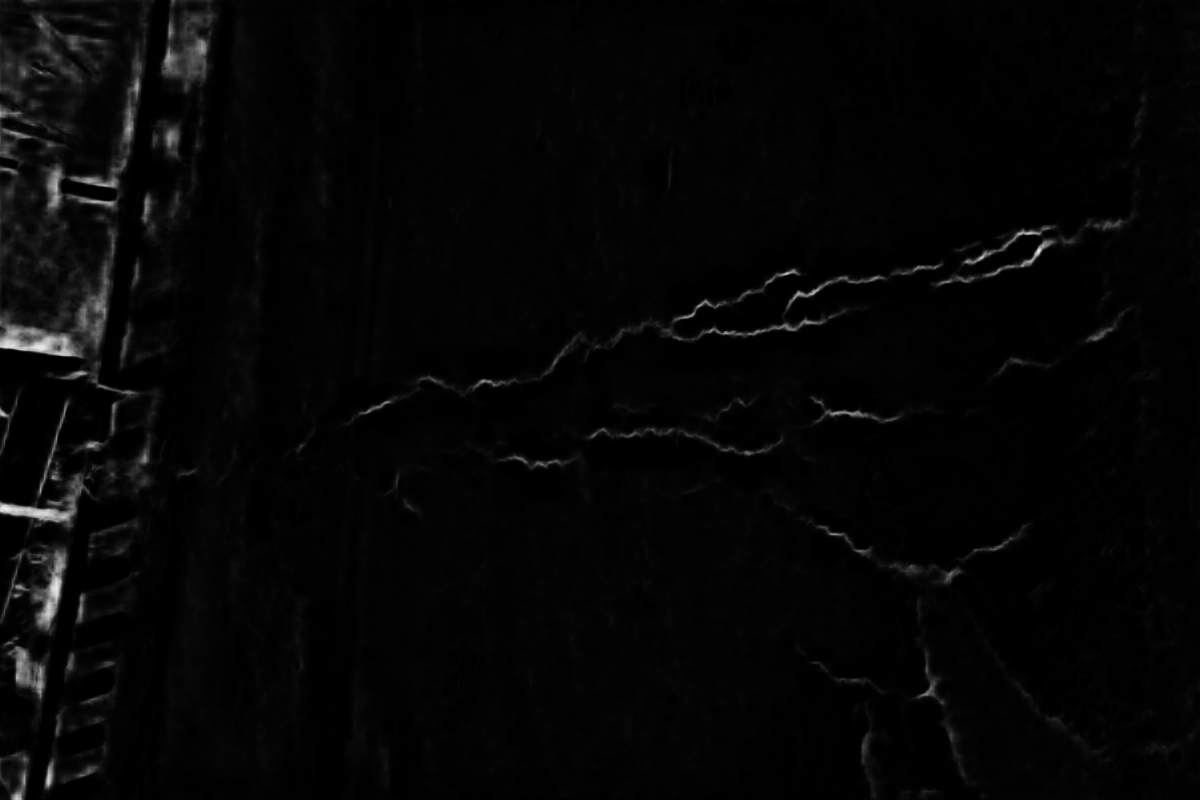

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # In colab you need to use this instead of cv2.imshow

im_path='/content/DeepSegmentor/results/deepcrack/test_latest/images/DSC_0181_fused.png'
# img is in BGR format if the underlying image is a color image
img = cv2.imdecode(np.fromfile(im_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)

cv2_imshow(img)

# 7. Extras

## 7.1 Delete test images and results

In [ ]:
# Where test images you need to upload
!rm /content/DeepSegmentor/datasets/DeepCrack/test_img/*
# Where test results are saved
!rm /content/DeepSegmentor/results/deepcrack/test_latest/images/*

## 7.2 Zip results and then download

This code will create a zip called "myresults.zip"

In [ ]:
!zip myresults.zip /content/DeepSegmentor/results/deepcrack/test_latest/images/*

Finally, find the file and download as usually.